In [1]:
from datetime import datetime
import json
import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import dateutil.parser

import seaborn as sns
sns.set(style="whitegrid")

from utils import get_data


In [2]:
with open('configs.json', 'r') as f:
    configs = json.load(f)

path = configs['DATA_DIRECTORY']

list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]


In [3]:
srpe, wellness, injury = get_data(list_subfolders_with_paths)

In [ ]:
# srpe = pd.DataFrame()
# wellness = pd.DataFrame()
# injury = pd.DataFrame()
# 
# for i, path in enumerate(list_subfolders_with_paths):
#     # read srpe data
#     srpe_file = f'{path}\\pmsys\\srpe.csv'
#     if os.path.exists(srpe_file):
#         srpe_temp = pd.read_csv(srpe_file)
#         srpe_temp['pid'] = i + 1
#         srpe_temp['end_date_time'] = srpe_temp['end_date_time'].apply(lambda x: 
#                                                                  datetime.utcfromtimestamp(int(dateutil.parser.parse(x).timestamp())))
#         srpe_temp.sort_values('end_date_time', inplace=True)
#         srpe = pd.concat([srpe, srpe_temp], ignore_index=True)
#     else:
#         print(f"File {srpe_file} doesn't exist!")
#     
#     # read wellness data
#     wellness_file = f'{path}\\pmsys\\wellness.csv'  # effective_time_frame
#     if os.path.exists(wellness_file):
#         wellness_temp = pd.read_csv(wellness_file)
#         wellness_temp['pid'] = i + 1
#         wellness_temp['effective_time_frame'] = wellness_temp['effective_time_frame'].apply(
#             lambda x: datetime.utcfromtimestamp(int(dateutil.parser.parse(x).timestamp()))
#         )
#         wellness_temp.sort_values('effective_time_frame', inplace=True)
#         wellness = pd.concat([wellness, wellness_temp], ignore_index=True)
#     else:
#         print(f"File {wellness_file} doesn't exist!")
#     
#     # read injury data
#     injury_file = f'{path}\\pmsys\\injury.csv'
#     if os.path.exists(injury_file):
#         injury_temp = pd.read_csv(injury_file)
#         injury_temp['pid'] = i + 1
#         injury_temp['effective_time_frame'] = injury_temp['effective_time_frame'].apply(
#             lambda x: datetime.utcfromtimestamp(int(dateutil.parser.parse(x).timestamp()))
#         )
#         injury_temp.sort_values('effective_time_frame', inplace=True)
#         injury = pd.concat([injury, injury_temp], ignore_index=True)
#     else:
#         print(f"File '{injury_file}' doesn't exist!")
#        
#     

In [4]:
srpe.head()

,end_date_time,activity_names,perceived_exertion,duration_min,pid
0,2019-11-05 22:51:54,"['individual', 'running']",7.0,30.0,1
1,2019-11-11 21:15:15,"['individual', 'running']",6.0,30.0,1
2,2019-11-14 21:00:53,"['team', 'soccer']",7.0,60.0,1
3,2019-11-18 21:34:44,"['individual', 'endurance']",6.0,50.0,1
4,2019-11-21 21:06:25,"['team', 'soccer']",6.0,70.0,1


In [5]:
print("****************** SRPE ******************")
print("Total numbers of records:", len(srpe))
print("Number of entries equal to null:")
print("   end_date_time: ", len(srpe.loc[srpe['end_date_time'].isnull()])) 
print("   perceived_exertion: ", len(srpe.loc[srpe['perceived_exertion'].isnull()]))
print("   duration_min: ", len(srpe.loc[srpe['duration_min'].isnull()]))

****************** SRPE ******************
Total numbers of records: 783
Number of entries equal to null:
   end_date_time:  0
   perceived_exertion:  11
   duration_min:  11


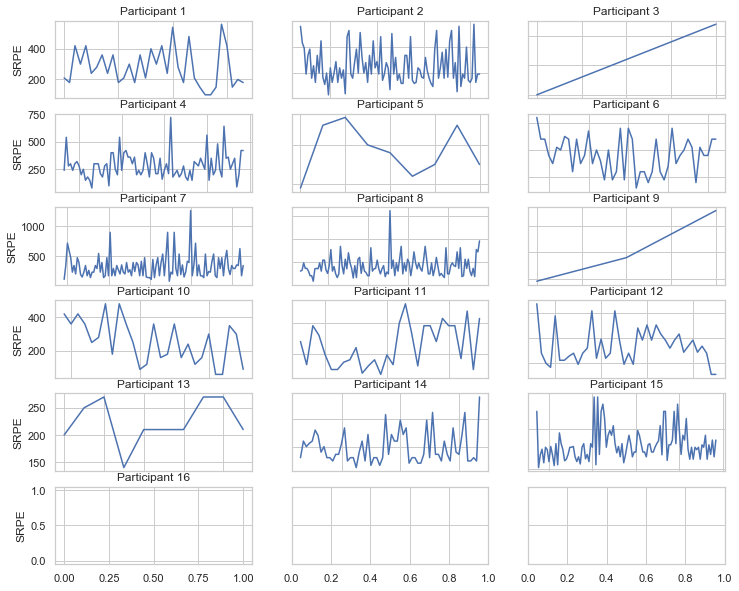

In [6]:
fig, axs = plt.subplots(int(np.ceil(len(srpe['pid'].unique()) / 3)), 3, figsize=(12, 10))

for pid in srpe['pid'].unique():
    y = srpe.loc[srpe['pid'] == pid, ['perceived_exertion', 'duration_min']]
    axs[int((pid-1) // 3), int((pid-1) % 3)].plot(y['perceived_exertion'] * y['duration_min'])
    axs[int((pid-1) // 3), int((pid-1) % 3)].set_title(f'Participant {pid}')

for ax in axs.flat:
    ax.set(ylabel='SRPE')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [4]:
srpe['date'] = srpe['end_date_time'].apply(lambda x: x.date())

srpe.head()

,end_date_time,activity_names,perceived_exertion,duration_min,pid,date
0,2019-11-05 22:51:54,"['individual', 'running']",7.0,30.0,1,2019-11-05
1,2019-11-11 21:15:15,"['individual', 'running']",6.0,30.0,1,2019-11-11
2,2019-11-14 21:00:53,"['team', 'soccer']",7.0,60.0,1,2019-11-14
3,2019-11-18 21:34:44,"['individual', 'endurance']",6.0,50.0,1,2019-11-18
4,2019-11-21 21:06:25,"['team', 'soccer']",6.0,70.0,1,2019-11-21


In [5]:
duplicate_rows = srpe.loc[:, ['end_date_time', 'pid', 'date']][srpe.duplicated(['date', 'pid'])]
print(duplicate_rows)

          end_date_time  pid        date
23  2020-02-06 20:04:08    1  2020-02-06
27  2020-02-21 09:42:39    1  2020-02-21
31  2020-03-05 21:00:22    1  2020-03-05
35  2019-11-03 14:50:17    2  2019-11-03
38  2019-11-08 15:25:57    2  2019-11-08
45  2019-11-18 19:34:37    2  2019-11-18
50  2019-11-26 17:30:31    2  2019-11-26
57  2019-12-05 17:17:33    2  2019-12-05
80  2020-01-10 16:24:04    2  2020-01-10
82  2020-01-12 15:10:50    2  2020-01-12
88  2020-01-21 12:03:30    2  2020-01-21
93  2020-01-27 20:14:16    2  2020-01-27
101 2020-02-10 19:54:01    2  2020-02-10
111 2020-02-26 17:45:24    2  2020-02-26
123 2020-03-19 14:45:21    2  2020-03-19
126 2020-03-22 13:48:42    2  2020-03-22
173 2020-01-12 21:52:14    4  2020-01-12
177 2020-01-18 00:32:08    4  2020-01-18
215 2020-03-28 11:53:54    4  2020-03-28
222 2020-01-02 19:43:08    5  2020-01-02
276 2019-11-09 14:38:23    7  2019-11-09
306 2019-12-12 18:37:51    7  2019-12-12
308 2019-12-13 17:30:16    7  2019-12-13
311 2019-12-15 1

In [6]:
srpe_aggregated = srpe.groupby(['date', 'pid']).aggregate({'perceived_exertion': 'sum', 'duration_min': 'sum'}).reset_index()

srpe_aggregated.head()

,date,pid,perceived_exertion,duration_min
0,2019-11-01,4,6.0,40.0
1,2019-11-02,6,8.0,40.0
2,2019-11-03,2,13.0,190.0
3,2019-11-04,6,6.0,40.0
4,2019-11-05,1,7.0,30.0


In [7]:
print('Statistics: ')
srpe_aggregated.loc[:, ['perceived_exertion', 'duration_min']].describe()

Statistics: 


,perceived_exertion,duration_min
count,730.000000,730.000000
mean,6.039726,64.753425
std,2.314696,38.603994
min,0.000000,0.000000
25%,5.000000,40.000000
50%,6.000000,60.000000
75%,7.000000,80.000000
max,16.000000,270.000000


In [8]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
srpe_aggregated['weekday'] = srpe_aggregated['date'].apply(lambda x: week_days[x.weekday()])

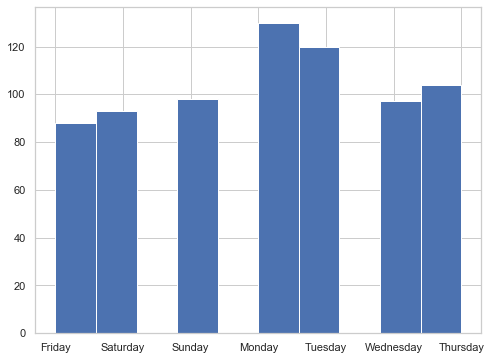

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.hist(srpe_aggregated['weekday'])
plt.show()


In [13]:
wellness.head()

,effective_time_frame,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,soreness_area,stress,pid
0,2019-11-01 08:31:40,2,3,5,6,3,2,[12921003],3,1
1,2019-11-02 10:00:01,2,3,6,6,3,2,[12921003],3,1
2,2019-11-03 14:28:03,3,3,8,6,3,3,[],3,1
3,2019-11-04 07:05:28,3,3,8,6,3,3,[],3,1
4,2019-11-05 06:13:35,3,3,8,5,3,3,[],3,1


In [9]:
wellness.loc[wellness['soreness_area'] == '[]', 'soreness_area'] = None
wellness.loc[wellness["soreness_area"].notnull(), 'soreness_area'] = wellness.loc[wellness["soreness_area"].notnull(), 'soreness_area'].apply(lambda x: json.loads(x.replace("'", '"')))

In [10]:
print("***************** Wellness *****************")
print("Total numbers of records:", len(wellness))
print("Number of entries equal to null:")
print("   effective_time_frame: ", len(wellness.loc[wellness['effective_time_frame'].isnull()])) 
print("   fatigue: ", len(wellness.loc[wellness['fatigue'].isnull()]))
print("   mood: ", len(wellness.loc[wellness['mood'].isnull()]))
print("   readiness: ", len(wellness.loc[wellness['readiness'].isnull()]))
print("   sleep_duration_h: ", len(wellness.loc[wellness['sleep_duration_h'].isnull()]))
print("   sleep_quality: ", len(wellness.loc[wellness['sleep_quality'].isnull()]))
print("   soreness: ", len(wellness.loc[wellness['soreness'].isnull()]))
print("   soreness_area: ", len(wellness.loc[wellness['soreness_area'].isnull()]))
print("   stress: ", len(wellness.loc[wellness['stress'].isnull()]))

***************** Wellness *****************
Total numbers of records: 1747
Number of entries equal to null:
   effective_time_frame:  0
   fatigue:  0
   mood:  0
   readiness:  0
   sleep_duration_h:  0
   sleep_quality:  0
   soreness:  0
   soreness_area:  1372
   stress:  0


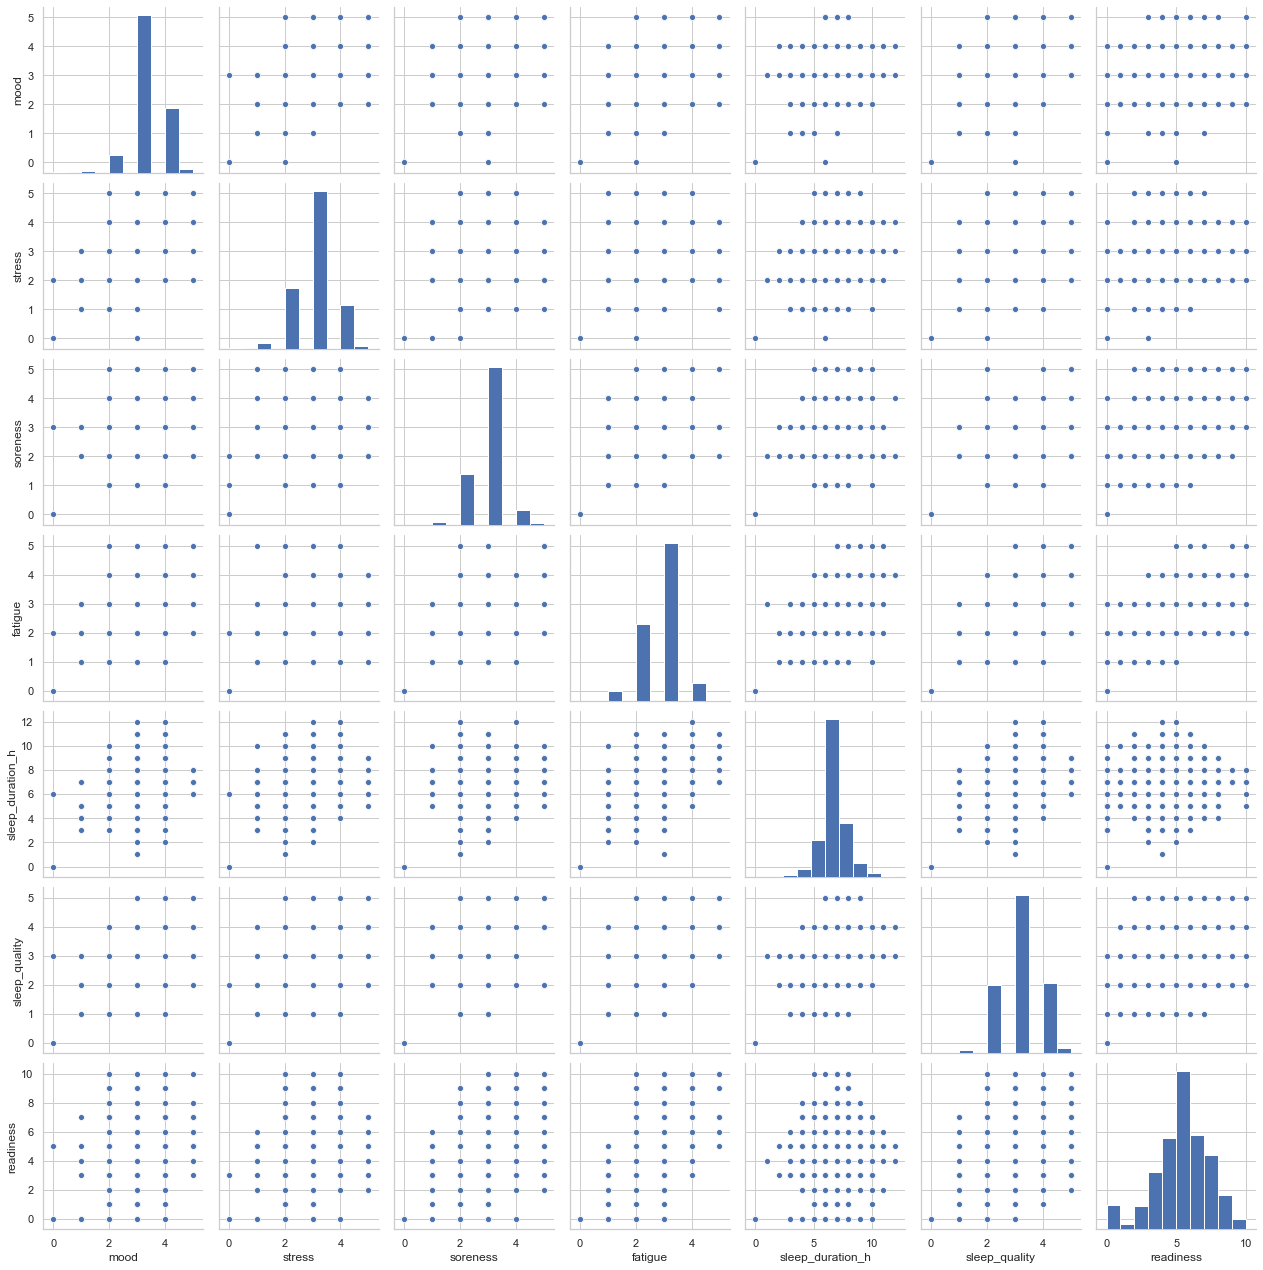

In [16]:
sns.pairplot(wellness.loc[:, ['mood', 'stress', 'soreness', 'fatigue', 'sleep_duration_h', 'sleep_quality', 'readiness']])

In [11]:
wellness['date'] = wellness['effective_time_frame'].apply(lambda x: x.date())

wellness.head()

,effective_time_frame,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,soreness_area,stress,pid,date
0,2019-11-01 08:31:40,2,3,5,6,3,2,[12921003],3,1,2019-11-01
1,2019-11-02 10:00:01,2,3,6,6,3,2,[12921003],3,1,2019-11-02
2,2019-11-03 14:28:03,3,3,8,6,3,3,None,3,1,2019-11-03
3,2019-11-04 07:05:28,3,3,8,6,3,3,None,3,1,2019-11-04
4,2019-11-05 06:13:35,3,3,8,5,3,3,None,3,1,2019-11-05


In [17]:
injury.head()

,effective_time_frame,injuries,pid
0,2019-11-07 06:39:48,{},1
1,2019-11-11 13:47:05,{},1
2,2019-11-18 08:28:53,{},1
3,2019-11-25 08:10:11,{},1
4,2019-12-02 08:10:19,{},1


In [12]:
injury.loc[injury['injuries'] == '{}', 'injuries'] = None
injury.loc[injury["injuries"].notnull(), 'injuries'] = injury.loc[injury["injuries"].notnull(), 'injuries'].apply(lambda x: json.loads(x.replace("'", '"')))

In [13]:
print("****************** Injury *******************")
print("Total numbers of records:", len(injury))
print("Number of entries equal to null:")
print("   effective_time_frame: ", len(injury.loc[injury['effective_time_frame'].isnull()])) 
print("   injuries: ", len(injury.loc[injury['injuries'].isnull()]))


****************** Injury *******************
Total numbers of records: 225
Number of entries equal to null:
   effective_time_frame:  0
   injuries:  148


In [14]:
injury['date'] = injury['effective_time_frame'].apply(lambda x: x.date())

injury.head()

,effective_time_frame,injuries,pid,date
0,2019-11-07 06:39:48,None,1,2019-11-07
1,2019-11-11 13:47:05,None,1,2019-11-11
2,2019-11-18 08:28:53,None,1,2019-11-18
3,2019-11-25 08:10:11,None,1,2019-11-25
4,2019-12-02 08:10:19,None,1,2019-12-02


In [15]:
# minor = 1
# major = 2
def severity(data):  
    _severity = 0
    for day_group in data['injuries'].values:
        for k, v in day_group.items():
            if v == 'minor':
                _severity += 1
            elif v == 'major':
                _severity += 2
            else:
                print('Different type of severity!')
    return _severity  


injury_severity = pd.DataFrame()

for pid, injury_group in injury.loc[injury["injuries"].notnull()].groupby('pid'):
    dates = list()
    severities = list()
    for date, group in injury_group.groupby('date'):
        dates.append(date)
        severities.append(severity(group))
    severity_temp = pd.DataFrame({'date': dates, 'injury_severity': severities})
    severity_temp['pid'] = pid
    severity_temp.sort_values('date', inplace=True)
    injury_severity = pd.concat([injury_severity, severity_temp], ignore_index=True)

In [16]:
injury_severity.head()

,date,injury_severity,pid
0,2020-01-07,1,1
1,2019-11-13,2,2
2,2019-11-26,1,4
3,2020-01-08,2,4
4,2020-01-26,2,4


In [17]:
print('The number of days with injury by participant id: ')
injury_severity['pid'].value_counts()

The number of days with injury by participant id: 


12    44
5     10
15     6
14     3
4      3
11     2
7      2
2      1
1      1
Name: pid, dtype: int64

In [18]:
df = wellness.merge(injury_severity, how='left', on=['pid', 'date'])

df = df.merge(srpe_aggregated.loc[:, ['date', 'pid', 'perceived_exertion', 'duration_min']], how='left', on=['pid', 'date'])

In [19]:
df.loc[df['injury_severity'].isnull(), 'injury_severity'] = 0
df.loc[df['perceived_exertion'].isnull(), 'perceived_exertion'] = 0
df.loc[df['duration_min'].isnull(), 'duration_min'] = 0

In [20]:
df.drop(columns=['effective_time_frame', 'soreness_area'], inplace=True)

In [27]:
df.head()

,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,stress,pid,date,injury_severity,perceived_exertion,duration_min
0,2,3,5,6,3,2,3,1,2019-11-01,0.0,0.0,0.0
1,2,3,6,6,3,2,3,1,2019-11-02,0.0,0.0,0.0
2,3,3,8,6,3,3,3,1,2019-11-03,0.0,0.0,0.0
3,3,3,8,6,3,3,3,1,2019-11-04,0.0,0.0,0.0
4,3,3,8,5,3,3,3,1,2019-11-05,0.0,7.0,30.0


In [28]:
len(df)

1747

In [29]:
df['pid'].value_counts()

6     147
4     145
1     138
5     137
7     133
14    125
11    107
8     104
9     102
2      99
10     96
15     95
12     83
16     82
3      82
13     72
Name: pid, dtype: int64

In [30]:
print('Non-NA cells for each column:')
df.count()

Non-NA cells for each column:


fatigue               1747
mood                  1747
readiness             1747
sleep_duration_h      1747
sleep_quality         1747
soreness              1747
stress                1747
pid                   1747
date                  1747
injury_severity       1747
perceived_exertion    1747
duration_min          1747
dtype: int64

In [21]:
df['srpe'] = df['perceived_exertion'] * df['duration_min']

# Reflection of training variation across the week
# Monotony = Mean sRPE/Standard Deviation
df['monotony'] = df.groupby('pid')['srpe'].apply(lambda x: x.rolling(7).mean() / x.rolling(7).std())

# Reflection of overall training stress from the week
# Strain = Weekly sRPE*Monotony
df['strain'] = df.groupby('pid')['srpe'].apply(lambda x: x.rolling(7).sum() * (x.rolling(7).mean() / x.rolling(7).std()))

In [32]:
srpe_statistics = pd.DataFrame(columns=['pid', 'mean', 'std'])
monotony_statistics = pd.DataFrame(columns=['pid', 'mean', 'std'])
strain_statistics = pd.DataFrame(columns=['pid', 'mean', 'std'])

for pid, group in df.groupby('pid'):
    srpe_statistics = srpe_statistics.append(
        {
            'pid': pid,
            'mean': group['srpe'].mean(),           
            'std': group['srpe'].std()
        },
        ignore_index=True
    )
    
    monotony_statistics = monotony_statistics.append(
        {
            'pid': pid,
            'mean': group['monotony'].mean(),            
            'std': group['monotony'].std()
        },
        ignore_index=True
    )
    
    strain_statistics = strain_statistics.append(
        {
            'pid': pid,
            'mean': group['strain'].mean(),            
            'std': group['strain'].std()
        },
        ignore_index=True
    )   
    
srpe_statistics.set_index('pid', inplace=True)
monotony_statistics.set_index('pid', inplace=True)
strain_statistics.set_index('pid', inplace=True)

srpe_statistics.index = srpe_statistics.index.astype(int)
monotony_statistics.index = monotony_statistics.index.astype(int)
strain_statistics.index = strain_statistics.index.astype(int)
    

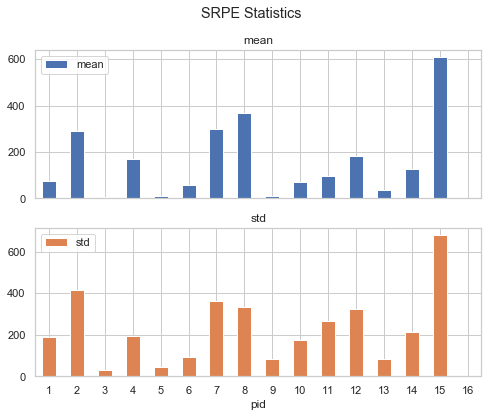

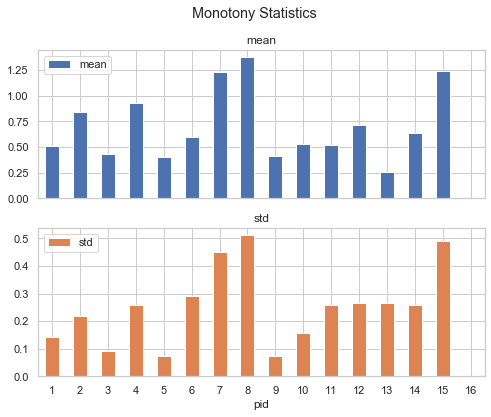

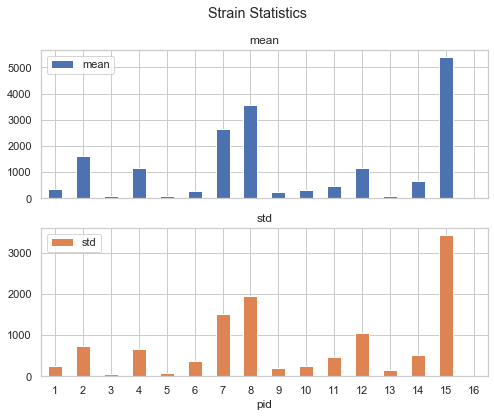

In [34]:
srpe_statistics.plot.bar(rot=0, subplots=True, figsize=(8, 6), title='SRPE Statistics')
monotony_statistics.plot.bar(rot=0, subplots=True, figsize=(8, 6), title='Monotony Statistics')
strain_statistics.plot.bar(rot=0, subplots=True, figsize=(8, 6), title='Strain Statistics')
plt.show()

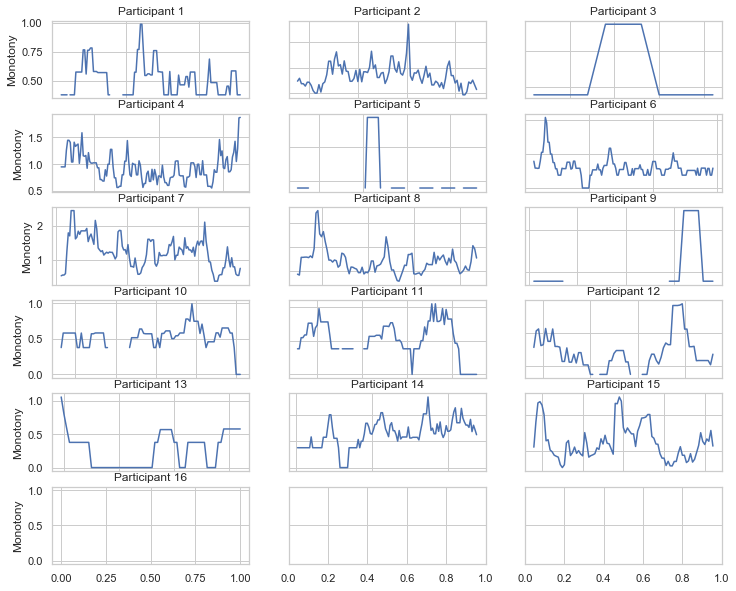

In [33]:
fig, axs = plt.subplots(int(np.ceil(len(df['pid'].unique()) / 3)), 3, figsize=(12, 10))

for pid in df['pid'].unique():
    y = df.loc[df['pid'] == pid, ['monotony']]
    axs[int((pid-1) // 3), int((pid-1) % 3)].plot(y)
    axs[int((pid-1) // 3), int((pid-1) % 3)].set_title(f'Participant {pid}')

for ax in axs.flat:
    ax.set(ylabel='Monotony')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

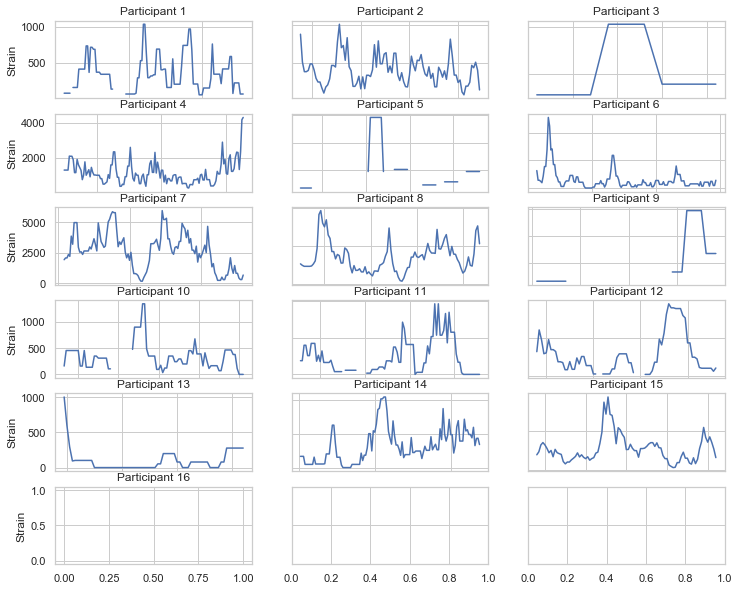

In [34]:
fig, axs = plt.subplots(int(np.ceil(len(df['pid'].unique()) / 3)), 3, figsize=(12, 10))

for pid in df['pid'].unique():
    y = df.loc[df['pid'] == pid, ['strain']]
    axs[int((pid-1) // 3), int((pid-1) % 3)].plot(y)
    axs[int((pid-1) // 3), int((pid-1) % 3)].set_title(f'Participant {pid}')

for ax in axs.flat:
    ax.set(ylabel='Strain')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

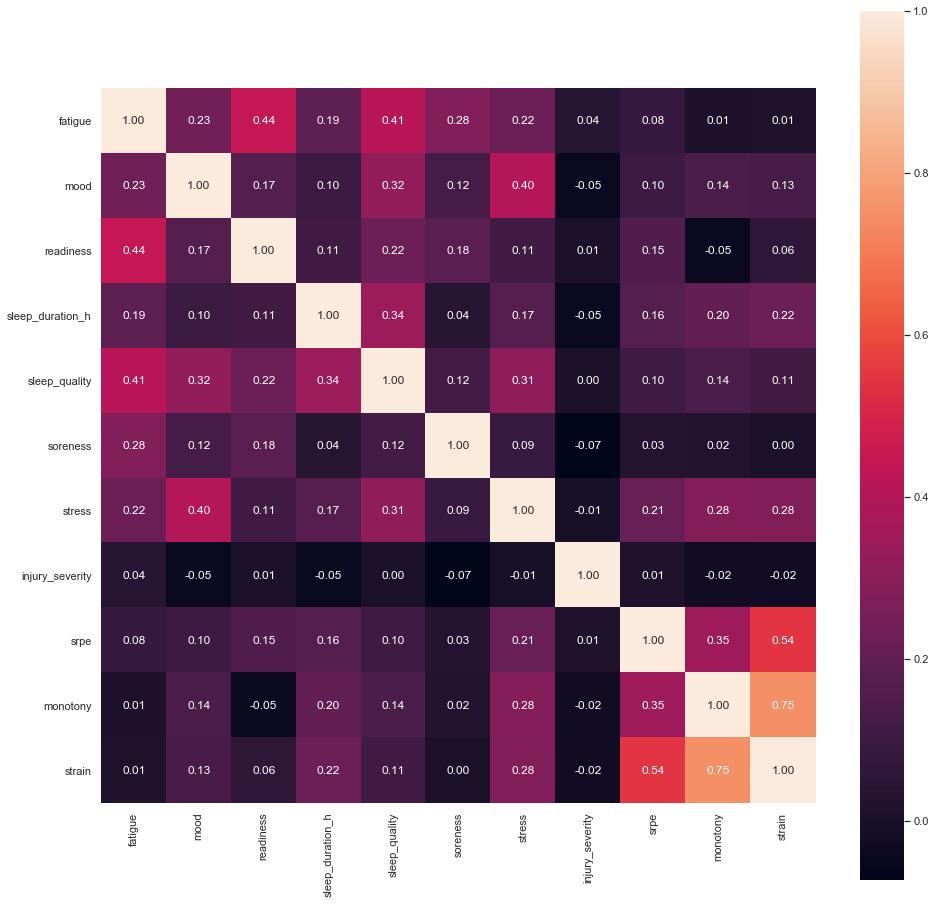

In [35]:
corr = df[df.columns[~df.columns.isin(['pid', 'date', 'perceived_exertion', 'duration_min'])]].dropna().corr()
plt.figure(figsize=(16, 16))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', xticklabels=True, yticklabels=True) 
plt.show()

In [36]:
df.count()


fatigue               1747
mood                  1747
readiness             1747
sleep_duration_h      1747
sleep_quality         1747
soreness              1747
stress                1747
pid                   1747
date                  1747
injury_severity       1747
perceived_exertion    1747
duration_min          1747
srpe                  1747
monotony              1302
strain                1302
dtype: int64

In [22]:
df.loc[df['monotony'].isnull(), 'monotony'] = -1
df.loc[df['strain'].isnull(), 'strain'] = -1

In [38]:
df.count()

fatigue               1747
mood                  1747
readiness             1747
sleep_duration_h      1747
sleep_quality         1747
soreness              1747
stress                1747
pid                   1747
date                  1747
injury_severity       1747
perceived_exertion    1747
duration_min          1747
srpe                  1747
monotony              1747
strain                1747
dtype: int64

In [24]:
df[df.columns[~df.columns.isin(['date', 'perceived_exertion', 'duration_min'])]].to_csv('dataset.csv', index=False)

In [ ]:
# 1. https://www.researchgate.net/publication/289128300_How_to_monitor_training_load_and_mode_using_sRPE
# "if the same total training load was instead equally divided into several consecutive ‘medium’ training days, the score for monotony would be high and the athlete’s risk of illness, overtraining and under-performance would increase."